# Evaluation test

In [2]:
import pandas as pd
import joblib

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_test = pd.read_csv('../data/preprocessed/imdb_reviews_test_clean.csv')

print(f"Shape test dataset: {df_test.shape}")
df_test.head()

Shape test dataset: (25000, 2)


,label,clean_text
0,1,go see movie last night coax friend mine admit...
1,1,actor turn director bill paxton follow promise...
2,1,recreational golfer knowledge sport history pl...
3,1,see film sneak preview delightful cinematograp...
4,1,bill paxton take true story we golf open make ...


Accuracy: 0.8765
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



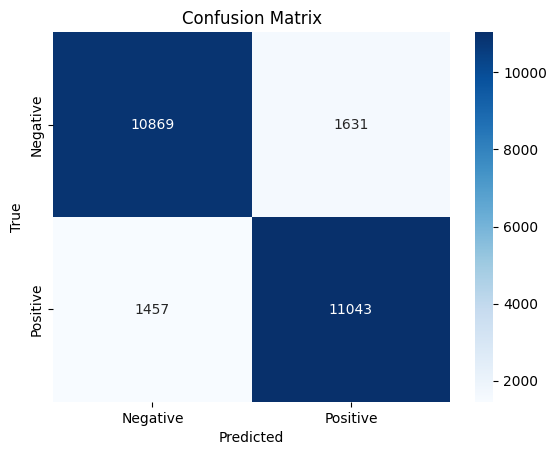

In [4]:
vectorizer = joblib.load('../models/vectorizer.joblib')
model = joblib.load('../models/best_model.joblib')

X_test_vect = vectorizer.transform(df_test['clean_text'])
y_test = df_test['label']

y_pred = model.predict(X_test_vect)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred,))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()